In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [7]:
df = pd.read_csv('dataset/fuel.csv')

X = df.copy()
y = X.pop('FE')

# preprocessing data using scaler and onehotencoder
preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)

y = np.log(y) 

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

display(df.head())

pd.DataFrame(X[:10,:]).head()

Input shape: [50]


,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

# params
learning_rate = 0.05
batch_size = 128
epochs = 100

opt = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(
    optimizer=opt,
    loss='mae',
)

# train model
history = model.fit(
    X, y,
    batch_size=batch_size,
    epochs=epochs,
)

Epoch 1/100
9/9 [==============================] - 0s 1ms/step - loss: 5.5039
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 1.8845
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.5556
Epoch 4/100
9/9 [==============================] - 0s 1ms/step - loss: 0.1819
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1212
Epoch 6/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0850
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0720
Epoch 8/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0701
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0646
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0726
Epoch 11/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0744
Epoch 12/100
9/9 [==============================] - 0s 1ms/step - loss: 0.0885
Epoch 13/100
9/9 [==============================] - 0s 1ms/st

<AxesSubplot:>

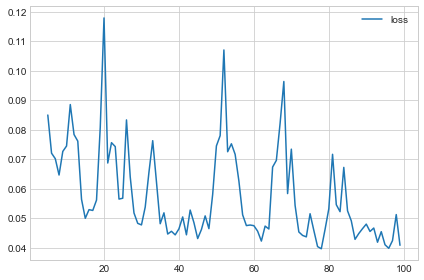

In [15]:
# plot the results
history_df = pd.DataFrame(history.history)
history_df.loc[5:, ['loss']].plot()

In [ ]:
# Good job, the loss seems quite good if we see the mean absolute deviation for FE column